In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))
import pandas as pd
from scripts.correlation_analysis import CorrelationAnalysis

- **Load the Data**

In [2]:
df_news = pd.read_csv("../data/raw_analyst_ratings.csv")
df_stock = pd.read_csv("../data/yfinance_data/NVDA_historical_data.csv")
# Drop the auto-generated column 
df_news = df_news.drop(columns=['Unnamed: 0'])
print(df_news.columns)
print(df_stock.columns)
ca = CorrelationAnalysis(df_news,df_stock)

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


- Converting to the appropriate format

In [3]:
ca.normalize_date()

In [4]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


In [5]:

df_news.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


### **Sentiment Analysis**

In [6]:
# Function to classify sentiment
ca.sentiment_analysis()

Aggregate Sentiment

In [7]:
# Group by date and compute average sentiment
ca.aggregate_sentiment()

,headline,url,publisher,date,stock,sentiment,avg_sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,0.0,0.110735
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,0.0,0.073184
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,0.0,0.079446
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,0.0,0.062068
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,0.0,0.062068


### **Date Alignment**

In [8]:
ca.align_date()



,headline,url,publisher,stock,sentiment,avg_sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.000000,0.110735,2020-06-05,8.79450,8.99700,8.70800,8.92000,8.893502,481748000,0.0,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.000000,0.073184,2020-06-03,8.82225,8.86625,8.70000,8.76950,8.739462,365440000,0.0,0.0
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.000000,0.079446,2020-05-26,9.15675,9.18175,8.67200,8.71775,8.687888,770780000,0.0,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.000000,0.062068,2020-05-22,8.82525,9.09300,8.71325,9.02625,8.995332,1038764000,0.0,0.0
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.000000,0.062068,2020-05-22,8.82525,9.09300,8.71325,9.02625,8.995332,1038764000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55225,Chinese Nano-Cap Momentum Stocks Sharply Highe...,https://www.benzinga.com/movers/18/01/10994518...,Paul Quintaro,ZX,0.046591,-0.001166,2018-01-05,5.35475,5.42275,5.27700,5.38500,5.327615,580124000,0.0,0.0
55226,28 Stocks Moving In Wednesday's Pre-Market Ses...,https://www.benzinga.com/news/17/12/10878295/2...,Lisa Levin,ZX,0.000000,0.091477,2017-12-06,4.64250,4.75350,4.62100,4.73150,4.681082,467032000,0.0,0.0
55227,China Zenix Auto International Reports Q3 EPAD...,https://www.benzinga.com/news/earnings/17/12/1...,Paul Quintaro,ZX,0.000000,0.091477,2017-12-06,4.64250,4.75350,4.62100,4.73150,4.681082,467032000,0.0,0.0
55228,46 Biggest Movers From Yesterday,https://www.benzinga.com/news/17/11/10788120/4...,Lisa Levin,ZX,0.000000,0.051870,2017-11-15,5.29875,5.30000,5.19500,5.24950,5.189955,501948000,0.0,0.0


### **Analysis**

In [9]:
# Calculate daily stock returns as the percentage change in closing prices

ca.calculate_correlation()

Correlation between avg_sentiment and daily return: -0.012094862036481482


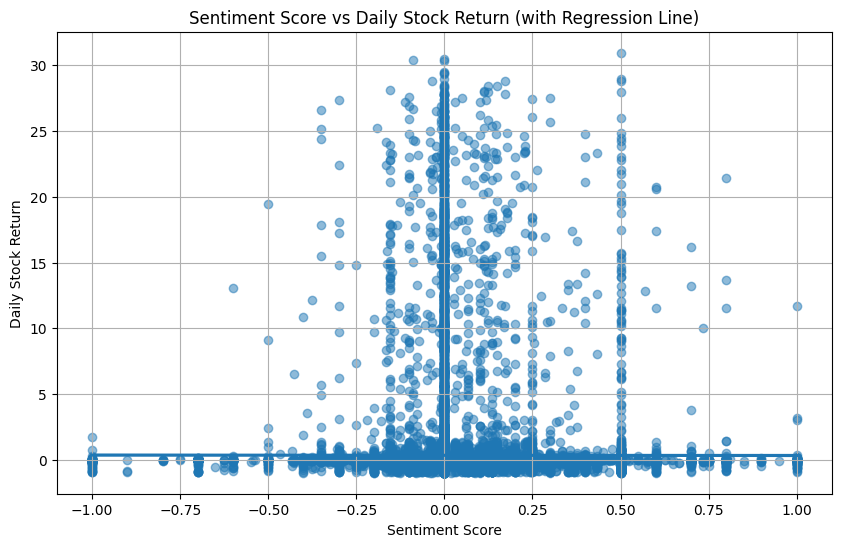

In [10]:
ca.plot_sentiment_vs_daily()

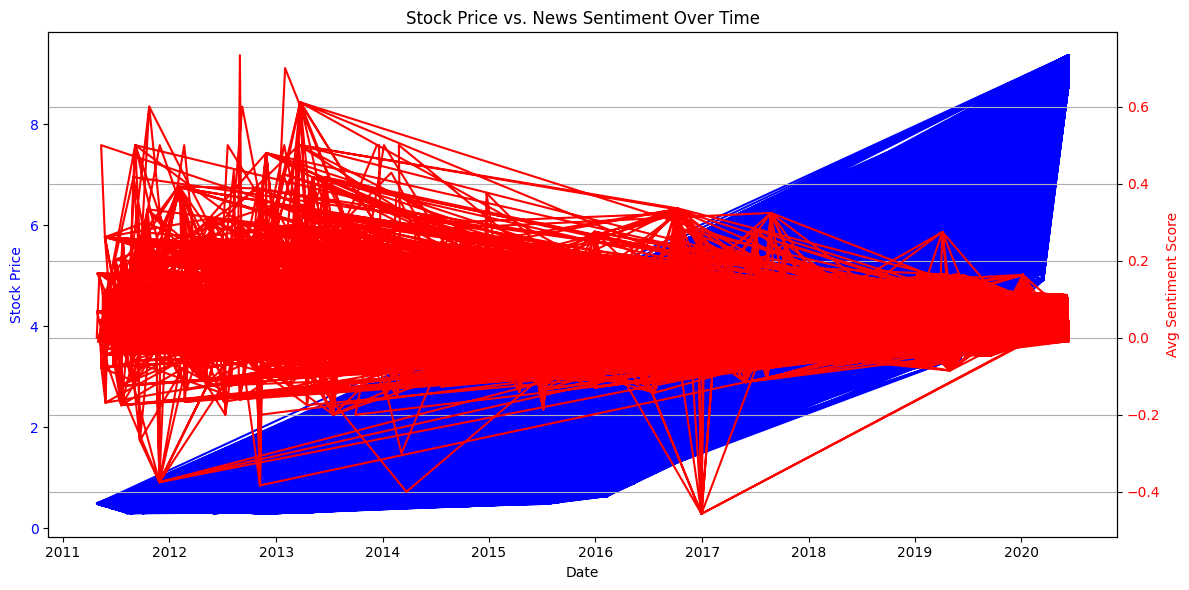

In [11]:
ca.plot_change()
